# DEMO: EUCLID-BOX

**Euclid-box**

Install: To start playing with this notebook, install the ```Likelihood Package``` and its modules according to README.
Alternatively you may be ready to run if ```Cobaya``` and ```CAMB/CLASS``` are installed.


Cobaya documentation: https://cobaya.readthedocs.io/en/latest/

In [50]:
# General python imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import interpolate 
import time 
import matplotlib.pyplot as plt

# Import Cobaya -need to be installed
from cobaya.run import run
# Import model wrapper of Cobaya to play around
from cobaya.model import get_model
# Import external loglike from the Likelihood Package within cobaya_interface.py
from likelihood.cobaya_interface import EuclidLikelihood

# Where sit your cobaya modules?
modules_path = "/data2/cobaya_modules/"
%matplotlib inline
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
plt.rc('font',size=25)
plt.rc('axes', titlesize=26)
plt.rc('axes', labelsize=25)
plt.rc('lines', linewidth=2)
plt.rc('lines', markersize=6)
plt.rc('legend', fontsize=20)
plt.rc('mathtext', fontset='stix')
plt.rc('font', family='STIXGeneral')

## CASE 1: Run `Cobaya` with Euclid-Likelihood  and `evaluate` (or any other `sampler` within `Cobaya`)

In [2]:
# We are running the Euclid-Likelihood as an external likelihood class for Cobaya
# Cobaya needs a dictionary or yaml file as input to start running

info = {
    #Which parameters would you like to sample?
    'params': {
        # If the prior dictionary is not passed to a parameter, this parameter is fixed
        'ombh2': 0.022445, 'omch2': 0.1205579307, 'H0': 67, 'tau': 0.0925,
        'mnu': 0.06, 'nnu': 3.046, 'As': 2.12605e-9,
        'ns': 0.96, 
        # Which observational probe would you like to use?
        # 1: photo-z
        # 2: spec
        # 12: both
        'like_selection': 2,
        # Want to use GC+XC+WL in photo? Then full_phot must be True
        'full_photo': True,
        # Bias parameters
        # Photo IST:F values
        'b1_photo': 1.0997727037892875,
        'b2_photo': 1.220245876862528,
        'b3_photo': 1.2723993083933989,
        'b4_photo': 1.316624471897739,
        'b5_photo': 1.35812370570578,
        'b6_photo': 1.3998214171814918,
        'b7_photo': 1.4446452851824907,
        'b8_photo': 1.4964959071110084,
        'b9_photo': 1.5652475842498528,
        'b10_photo': 1.7429859437184225,
        # Spec IST:F values
        'b1_spec': 1.46,
        'b2_spec': 1.61,
        'b3_spec': 1.75,
        'b4_spec': 1.90},
    # Which theory code you want to use, CAMB/CLASS? 
    # Here we use CAMB and specify CAMB args
    'theory': {'camb': {'stop_at_error': True, 'extra_args':{'num_massive_neutrinos': 1}}},
    # Which sampler do you want to use? Check COBAYA docs to see the list of available samplers
    # Here we use 'evaluate'
    'sampler': {'evaluate': None},  
    # Where have you installed your COBAYA modules (i.e: CAMB, polychord, likelihoods...)?
    'packages_path': modules_path,
    # Where are the results going to be stored, in case the sampler produce output files? 
    'output': 'chains/my_euclid_experiment',
    # Likelihood: we load the Euclid-Likelihood as an external function, and give the name 'Euclid'
    'likelihood': {'Euclid': EuclidLikelihood},
    # How much infomartion you want Cobaya to print? If debug = True, it prints every single detail
    'debug': False,
    # If timing = True, Cobaya returns how much time it took him to make a computation of the posterior
    'timing': True
    }

In [3]:
# Let's run Cobaya
info_updated, samples = run(info)

[output_mpi] Output to be read-from/written-into folder 'chains', with prefix 'my_euclid_experiment'
[output_mpi] Found existing info files with the requested output prefix: 'chains/my_euclid_experiment'
[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.
[camb] Importing *local* CAMB from /data2/cobaya_modules/code/CAMB
[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.
[camb] Importing *local* CAMB from /data2/cobaya_modules/code/CAMB
[evaluate] Initialized!
[evaluate] Looking for a reference point with non-zero prior.
[evaluate] Reference point:
   
[evaluate] Evaluating prior and likelihoods...
[evaluate] log-posterior  = -7.36526
[evaluate] log-prior      = 0
[evaluate]    logprior_0 = 0
[evaluate] log-likelihood = -7.36526
[evaluate]    chi2_Euclid = 14.7305
[evaluate] Derived params:
[euclid] Average evaluation time for Euclid: 8.27697 s  (1 evaluations)
[camb.transfers] Average evaluation time for camb.t

# Case 2: Run `Cobaya model` with Euclid-Likelihood 

User-case: imagine you are running a MCMC sampling to find the best fit values of $\Lambda CDM$. Because of an unknown reason, your MCMC chains are getting stuck. The `wrapper model` of Cobaya allows you to investigate what's going on within Cobaya at each step of the algorithm. It's a wrapper of the `evaluate` sampler above, which also gives you the possibility of understanding, seeing and retrieving derived parameters and quantities.

In [4]:
# You can reproduce the option 'evaluate' with the model wrapper of Cobaya, which gives you more flexibility
# Create a Cobaya model using the model wrapper of Cobaya. Remember, as input, it needs a yaml or dictionary
t1 = time.time()
model = get_model(info)
print('Time for initialization of the likelihood: ', time.time()-t1)

[model] *WARNING* Ignored blocks/options: ['sampler', 'output']
[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.
[camb] Importing *local* CAMB from /data2/cobaya_modules/code/CAMB
[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.
[camb] Importing *local* CAMB from /data2/cobaya_modules/code/CAMB
Time for initialization of the likelihood:  9.185299634933472


**Comment**: you see as Cobaya output:
- Model: it tells you Cobaya is using the `model` wrapper and it's reading the info dictionary.
- Prior: which parameters are you sampling? In this case, none, this is why it reminds you that.
- CAMB: it calls the theory code you wanted to use (CAMB/CLASS, in this case, CAMB, and where it is installed)

You see these output repeated twice because you are internally calling `Cobaya`, within the EuclidLikelihood, to calculate the fiducial cosmology.

It takes around 10 seconds to initialize the likelihood (reading ou-level3 data and compute fiducial cosmology) 

In [5]:
# You can have an insight of which theory requirements 
# the likelihood is asking to the theory code (aka CAMB)?
print('\n Requirements \n')
print(model.provider.requirement_providers)
# So, what have we requested?
print('\n Requested \n')
print(model.requested())


 Requirements 

{'Pk_interpolator': camb, 'comoving_radial_distance': camb, 'angular_diameter_distance': camb, 'Hubble': camb, 'sigma_R': camb, 'fsigma8': camb, 'CAMB_transfers': camb.transfers}

 Requested 

{'camb.transfers': [{'CAMB_transfers':{'non_linear': False, 'needs_perts': True}}], 'camb': [{'Pk_interpolator':{}}, {'comoving_radial_distance':{'z': array([0.        , 0.04040404, 0.08080808, 0.12121212, 0.16161616,
       0.2020202 , 0.24242424, 0.28282828, 0.32323232, 0.36363636,
       0.4040404 , 0.44444444, 0.48484848, 0.52525253, 0.56565657,
       0.60606061, 0.64646465, 0.68686869, 0.72727273, 0.76767677,
       0.80808081, 0.84848485, 0.88888889, 0.92929293, 0.96969697,
       1.01010101, 1.05050505, 1.09090909, 1.13131313, 1.17171717,
       1.21212121, 1.25252525, 1.29292929, 1.33333333, 1.37373737,
       1.41414141, 1.45454545, 1.49494949, 1.53535354, 1.57575758,
       1.61616162, 1.65656566, 1.6969697 , 1.73737374, 1.77777778,
       1.81818182, 1.85858586, 1.898

In [6]:
# To execute the likelihood with the model wrapper, you need to make an evaluation of the posterior
# Attention: if a parameter is sampled, we need to obtain a value from the prior
# i.e: 
# point = dict(zip(model.parameterization.sampled_params(),
#                 model.prior.sample(ignore_external=True)[0]))
# If all the parameters are fixed, just call the posterior
t1 = time.time()
logposterior = model.logposterior({})
t2 = time.time()
print('Time to compute the logposterior: ', t2-t1)
print('Full log-posterior:')
print('   logposterior: %g' % logposterior.logpost)
print('   logpriors: %r' % dict(zip(list(model.prior), logposterior.logpriors)))
print('   loglikelihoods: %r' % dict(zip(list(model.likelihood), logposterior.loglikes)))
print('   derived params: %r' % dict(zip(list(model.parameterization.derived_params()), logposterior.derived)))

Time to compute the logposterior:  9.233921766281128
Full log-posterior:
   logposterior: -7.36526
   logpriors: {'0': 0.0}
   loglikelihoods: {'Euclid': -7.365261474841869}
   derived params: {}


# Case 3: EuclidLikelihood package

User-case: imagine you have actually loaded the `model` wrapper of Cobaya, but you are unable yet to find what the issue is. In this case, we aim to go one level deeper in the computation: we are going to have a grasp of what EuclidLikelihood actually does (theoretical recipe of the observables, reading the data, computation of the $\chi^2$. 

Disclaimer: the steps below are done internally by `Cobaya` at each step of the sampling procedure within the file `cobaya_interface.py` of the likelihood package.

In [9]:
# Create an instance of the class EuclidLikelihood
like = EuclidLikelihood()
# Initialize default parameters for redshift, k-array, fiducial cosmology...
like.initialize()
# Get the cosmo_dictionary where all the cosmology + theory parameters are saved
# ATTENTION: you need to pass the `cobaya wrapper` model initialized above as an argument of the function
# as well as the parameters of your theory
# When only Cobaya is used, it creates internally this model instance
like.passing_requirements(model, **model.provider.params)
# Update the cosmology dictionary with interpolators + basic quantities such as
# P_gg, P_delta...
# DISCLAIMER: this cosmology dictionary cosmo_dic is an attribute of the class Cosmology but it is also
# saved as an attribute of the class EuclidLikelihood
like.cosmo.update_cosmo_dic(like.cosmo.cosmo_dic['z_win'], 0.05)
# Show what the cosmo_dic actually contains
print('\nKeys of the cosmo_dic: \n', list(like.cosmo.cosmo_dic.keys()))
print('\nKeys of the nuisance_paramaters within cosmo_dic: \n', list(like.cosmo.cosmo_dic['nuisance_parameters'].keys()))

[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.
[camb] Importing *local* CAMB from /data2/cobaya_modules/code/CAMB
[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.
[camb] Importing *local* CAMB from /data2/cobaya_modules/code/CAMB

Keys of the cosmo_dic: 
 ['H0', 'omch2', 'ombh2', 'omnuh2', 'omkh2', 'w', 'mnu', 'tau', 'nnu', 'ns', 'As', 'sigma_8_0', 'comov_dist', 'angular_dist', 'H', 'Pk_interpolator', 'Pk_delta', 'Pgg_phot', 'Pgdelta_phot', 'Pgg_spec', 'Pgdelta_spec', 'Pii', 'Pdeltai', 'Pgi_phot', 'Pgi_spec', 'fsigma8', 'sigma_8', 'c', 'z_win', 'k_win', 'r_z_func', 'd_z_func', 'H_z_func', 'sigma8_z_func', 'fsigma8_z_func', 'MG_mu', 'MG_sigma', 'nuisance_parameters', 'D_z_k', 'f_z_k']

Keys of the nuisance_paramaters within cosmo_dic: 
 ['like_selection', 'full_photo', 'b1_photo', 'b2_photo', 'b3_photo', 'b4_photo', 'b5_photo', 'b6_photo', 'b7_photo', 'b8_photo', 'b9_photo', 'b10_photo', 'b1_spec', 'b2_spe

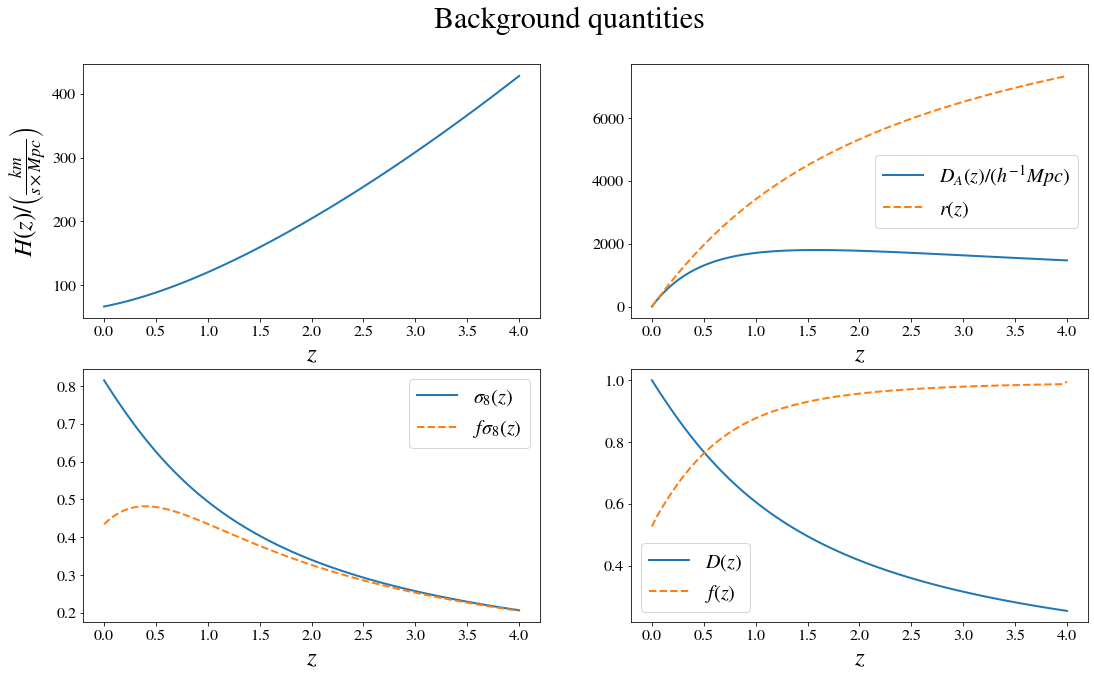

In [94]:
# Let's plot the background quantities of cosmo_dic
fig, axs = plt.subplots(2, 2, figsize=(18,10))
fig.suptitle('Background quantities')
axs[0, 0].plot(like.cosmo.cosmo_dic['z_win'], like.cosmo.cosmo_dic['H_z_func'](like.cosmo.cosmo_dic['z_win']))
axs[0, 0].set_xlabel(r'$z$')
axs[0, 0].set_ylabel(r'$H(z) / \left( \frac{km}{s\times Mpc}\right)$')
axs[0, 1].plot(like.cosmo.cosmo_dic['z_win'], like.cosmo.cosmo_dic['d_z_func'](like.cosmo.cosmo_dic['z_win']),
              label = r'$D_A(z) / (h^{−1}Mpc)$')
axs[0, 1].plot(like.cosmo.cosmo_dic['z_win'], like.cosmo.cosmo_dic['r_z_func'](like.cosmo.cosmo_dic['z_win']), '--',
              label = r'$r(z)$')
axs[0, 1].set_xlabel(r'$z$')
axs[0, 1].legend()
axs[1, 0].plot(like.cosmo.cosmo_dic['z_win'], like.cosmo.cosmo_dic['sigma8_z_func'](like.cosmo.cosmo_dic['z_win']),
              label = r'$\sigma_8(z)$')
axs[1, 0].plot(like.cosmo.cosmo_dic['z_win'], like.cosmo.cosmo_dic['fsigma8_z_func'](like.cosmo.cosmo_dic['z_win']),
              '--', label = r'$f\sigma_8(z)$')
axs[1, 0].set_xlabel(r'$z$')
axs[1, 0].legend()
axs[1, 1].plot(like.cosmo.cosmo_dic['z_win'], like.cosmo.cosmo_dic['D_z_k'],
              label = r'$D(z)$')
axs[1, 1].plot(like.cosmo.cosmo_dic['z_win'], like.cosmo.cosmo_dic['f_z_k'](like.cosmo.cosmo_dic['z_win']), '--',
               label = r'$f(z)$')
axs[1, 1].set_xlabel(r'$z$');
axs[1, 1].legend()
plt.subplots_adjust(top=0.90)

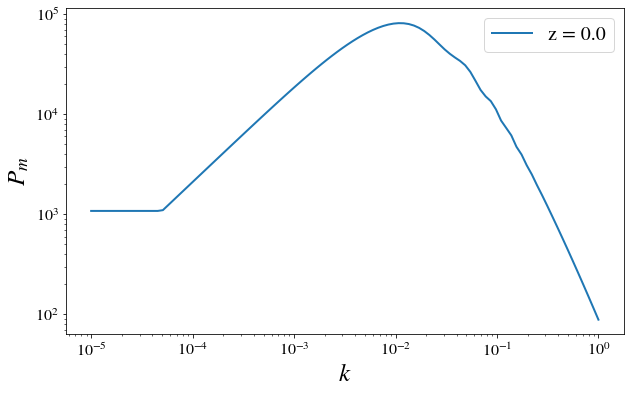

In [86]:
# Let's plot the matter power spectrum
plt.figure(figsize=(10,6));
ks=np.logspace(-5, 0, 100)
plt.loglog(ks, like.cosmo.cosmo_dic['Pk_delta'].P(like.cosmo.cosmo_dic['z_win'][0], ks), 
           label=r"z = {}".format(like.cosmo.cosmo_dic['z_win'][0]))
plt.xlabel(r'$k$')
plt.ylabel(r'$P_m $')
plt.legend()

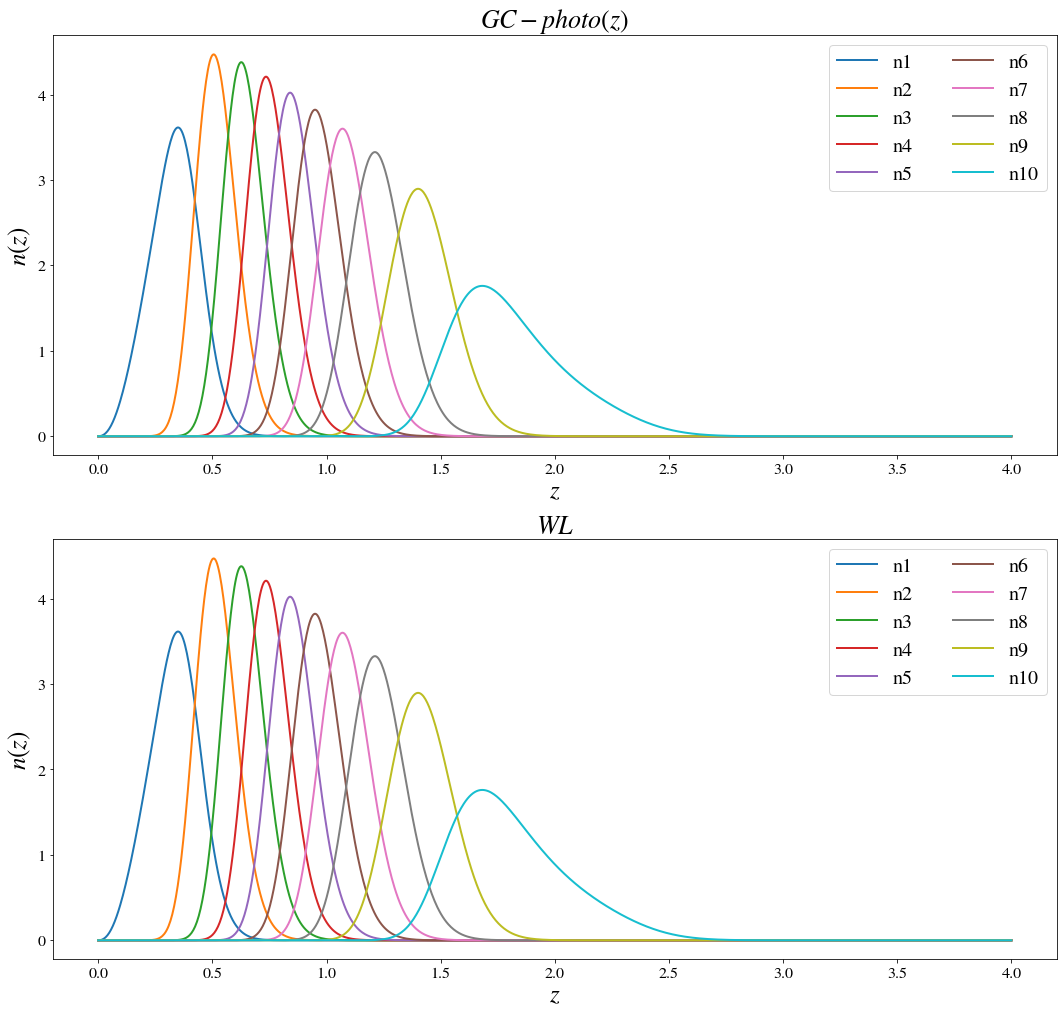

In [87]:
# We can also plot the initial data read by the like_calc module (class Euclike). 
# DISCLAIMER: the data is read in the reader module, but it is saved as attribute of the Euclike class too
# The instance of the Euclike class is saved as an attribute of the EuclidLiliehood
# i.e: let's plot the galaxy distributions for GC-photo(z) and WL (AT THE MOMENT, THEY ARE THE SAME)
zs = np.linspace(0, 4, 1000)
fig, axs = plt.subplots(2, 1, figsize=(18,17))
for key, value in like.likefinal.data_ins.nz_dict_GC_Phot.items():
    axs[0].plot(zs, value(zs), label = key)
for key, value in like.likefinal.data_ins.nz_dict_WL.items():
    axs[1].plot(zs, value(zs), label = key)
axs[0].set_xlabel(r'$z$')
axs[0].set_ylabel(r'$n(z)$')
axs[0].set_title(r'$GC-photo(z)$')
axs[0].legend(ncol=2)
axs[1].set_xlabel(r'$z$')
axs[1].set_ylabel(r'$n(z)$')
axs[1].set_title(r'$WL$')
axs[1].legend(ncol=2);
#plt.subplots_adjust(top=0.90)